# Edge detection
### Canny filter
### Morphological operator
## Tasks
* Try different thresholds for binarization (lena)
* Apply skeletonize, erosion to bin images (lena,camera)
* Apply canny filter (lena, camera)


### Binarization

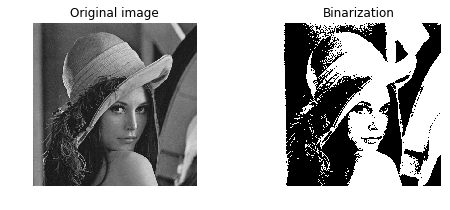

In [21]:
import cv2
import os
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.morphology import disk

lenka = data.imread(os.path.join(data_dir, "lena_cover.jpg"), as_grey=True)
tt = np.median(lenka)
binary = lenka > tt

fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(lenka, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Binarization')
for a in ax:
    a.axis('off')
plt.show()

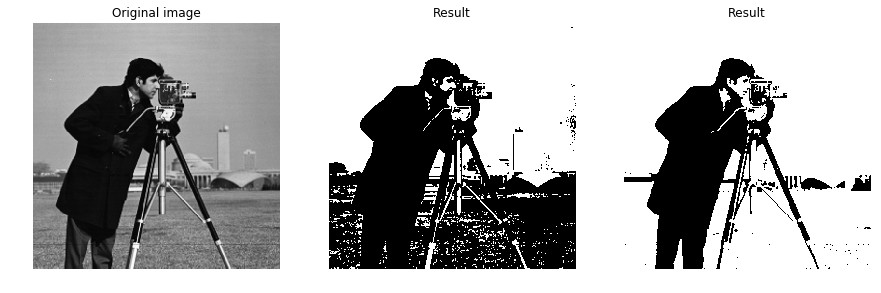

In [20]:
image = data.camera()
tt = np.median(image)
binary = image > tt

tt = tt - 60
new_tt = image > tt

fig, axes = plt.subplots(ncols=3, figsize=(15, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

ax[2].imshow(new_tt, cmap=plt.cm.gray)
ax[2].set_title('Result')
for a in ax:
    a.axis('off')

plt.show()

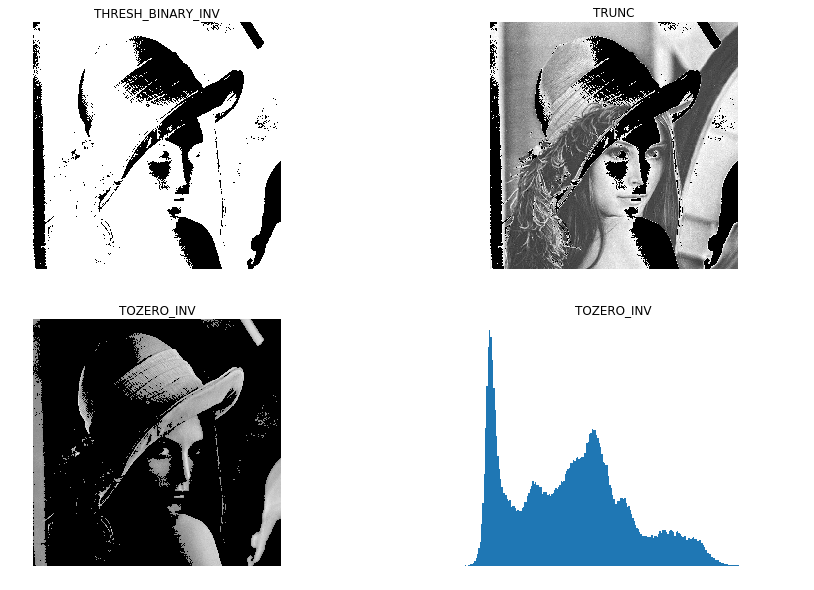

In [12]:
im = cv2.imread('lena_cover.jpg', 0)
ret,thresh1 = cv2.threshold(im,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(im,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(im,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(im,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(im,127,255,cv2.THRESH_TOZERO_INV)
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title("THRESH_BINARY_INV")
plt.axis("off")
plt.imshow(thresh2, 'gray')
plt.subplot(222)
plt.title("TRUNC")
plt.axis("off")
plt.imshow(thresh5, 'gray')
plt.subplot(223)
plt.title("TOZERO_INV")
plt.axis("off")
plt.imshow(thresh4, 'gray')
plt.subplot(224)
plt.title("TOZERO_INV")
plt.axis("off")
plt.hist(im.ravel(),256,[0,256]); 



plt.show()


In [14]:
from skimage.util import img_as_ubyte
from skimage import io

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')
    plt.show()

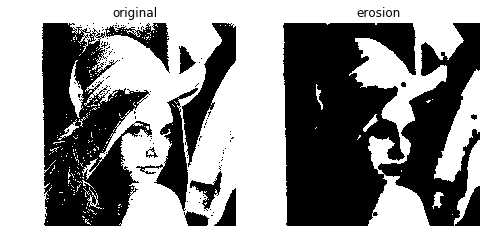

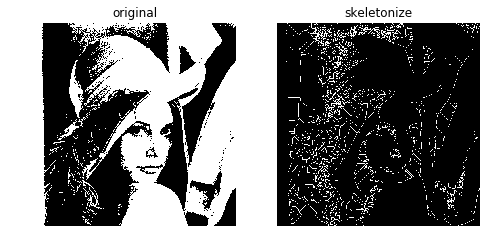

In [16]:
from skimage.morphology import erosion, dilation, opening, closing, skeletonize
selem = disk(6)
eroded = erosion(binary, selem)
plot_comparison(binary, eroded, 'erosion')
sk = skeletonize(binary == 0)
plot_comparison(binary, sk, 'skeletonize')

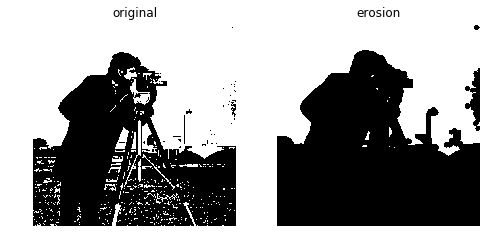

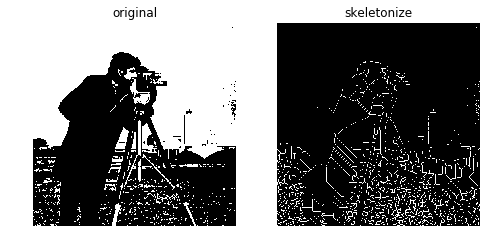

In [17]:
image = data.camera()
tt = np.median(image)
bnr = image > tt
selem = disk(6)
eroded = erosion(bnr, selem)
plot_comparison(bnr, eroded, 'erosion')
sk = skeletonize(bnr == 0)
plot_comparison(bnr, sk, 'skeletonize')
plt.show()

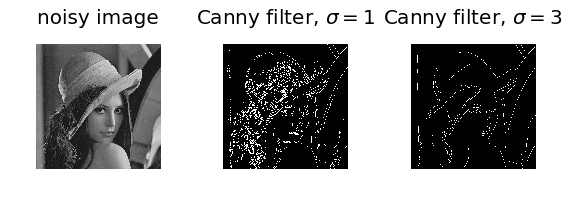

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import feature
im = lenka
# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)
# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

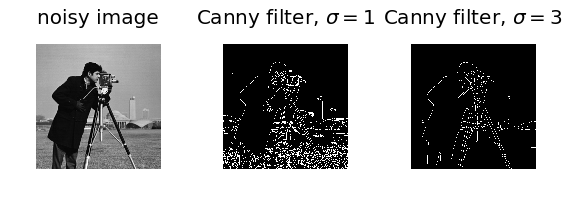

In [19]:
im = data.camera()
# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)
# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()